# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PART TWO 
# 1. IMPORTING DATA AND DATA CLEANING PROCESS

In [2]:
# DATA IMPORT
df = pd.read_csv('county_census_population.csv', thousands=',')
top_cities = pd.read_csv('top_ten_small_cities_US.csv', thousands = ',')

# RENAMING COLUMNS TO REMOVE SPACES
df.columns = [column.replace(" ", "_") for column in df.columns]

# REPLACING ABBREVATED STATE NAMES
df = df.replace(to_replace=["OH","PA","FL","MD","NY","TX","VA","NC","WI"], value=["Ohio","Pennsylvania","Florida","Maryland","New York","Texas","Virginia","North Carolina","Wisconsin"])

top_cities = top_cities.replace(to_replace=["IN","TX","MN","MA","WA","CA","VA","MD","KS","NC","MA","CO","VA","MN","OR","NJ","OH","NE","NC","PA"],
value=["Illinois","Texas","Minnesota","Massachusetts","Washington","California","Virginia","Maryland","Kansas","North Carolina","Massachusetts",
"Colorado","Virginia","Minnesota","Oregon","New Jersey","Ohio","Nebraska","North Carolina","Pennsylvania"]
)

# DROPPING NULL VALUES / EXTRA TEXT AT THE BOTTOM OF THE TOP CITIES ORIGINAL DATA SET
top_cities = top_cities.dropna()

# CONVERTING YEAR TO INT FROM TEXT TO ALLOW MERGING LATER
top_cities['Year'] = top_cities['Year'].astype(int)



## ADDING TOTAL POPULATION COLUMN

In [3]:
# ADDED COLUMN WHICH ADDS MALE AND FEMALE POPULATIONS

df["total_population"] = df["female_total_population"] + df["male_total_population"]

# RENAMING COLUMNS
top_cities.columns = ['city','state','county_name','rank','year','city_population']

In [4]:
# DATAFRAME PREVIEW
df.head()

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
0,Stark County,Ohio,2010,192458,10596,12137,11559,11944,10981,10403,...,13518,14796,13518,11326,8768,5663,4749,"3,653","2,740",375128
1,Summit County,Ohio,2010,279312,15657,16216,17335,18173,17055,16776,...,19910,21220,19648,14670,9431,8645,6549,"5,239","3,144",541547
2,Trumbull County,Ohio,2010,108273,5858,6401,6835,6726,5425,5641,...,7203,8217,7000,7608,5782,3043,2536,"2,638","1,522",209719
3,Tuscarawas County,Ohio,2010,47232,2600,2459,3640,3073,2317,2979,...,3259,3666,2806,3259,1811,1811,1086,"1,132",634,92540
4,Warren County,Ohio,2010,105706,6765,7399,8985,6765,4440,5602,...,8921,7954,5589,6127,3547,2472,1827,"1,397",752,213192


In [5]:
# TOP CITIES DATAFRAME PREVIEW

top_cities.head()

,city,state,county_name,rank,year,city_population
0,Carmel,Illinois,Hamilton County,1.0,2012,80100.0
1,McKinney,Texas,Collin County,2.0,2012,136100.0
2,Eden Prairie,Minnesota,Hennepin County,3.0,2012,61200.0
3,Newton,Massachusetts,Middlesex County,4.0,2012,84700.0
4,Redmond,Washington,King County,5.0,2012,55200.0


# 2. MERGING OF TWO DATASETS WITH ALL THE DATA FROM COUNTY CENSUS DATASET

In [6]:
merged_data = pd.merge(df, top_cities, on=['county_name','state'], how='right')
merged_data.head()

,county_name,state,year_x,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,city,rank,year_y,city_population
0,Hamilton County,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Carmel,1.0,2012,80100.0
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,11622.0,6199.0,4262.0,"2,324","2,324",787605.0,McKinney,2.0,2012,136100.0
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,13585.0,6393.0,4795.0,"1,998","2,397",811826.0,McKinney,2.0,2012,136100.0
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,13970.0,8629.0,4931.0,"2,876","2,465",833383.0,McKinney,2.0,2012,136100.0
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,13446.0,9664.0,5462.0,"3,782","2,101",853923.0,McKinney,2.0,2012,136100.0


## Note - Number 1 ranked Hamilton County, IL for 2012 had no data in county_census_population file. Hence null values are shown for it

In [7]:
#DROPPING NULL VALUES - HAMILTON COUNTY DATA BECAUSE THIS DATA IS NOT PRESENT IN COUNTY CENSUS FILE
merged_data = merged_data.dropna()

In [8]:
# MERGED DATAFRAME PREVIEW

merged_data.head()

,county_name,state,year_x,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,city,rank,year_y,city_population
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,11622.0,6199.0,4262.0,"2,324","2,324",787605.0,McKinney,2.0,2012,136100.0
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,13585.0,6393.0,4795.0,"1,998","2,397",811826.0,McKinney,2.0,2012,136100.0
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,13970.0,8629.0,4931.0,"2,876","2,465",833383.0,McKinney,2.0,2012,136100.0
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,13446.0,9664.0,5462.0,"3,782","2,101",853923.0,McKinney,2.0,2012,136100.0
5,Collin County,Texas,2014.0,451388.0,27958.0,34271.0,35173.0,29762.0,25252.0,26154.0,...,15201.0,10858.0,6080.0,"3,040","2,606",885692.0,McKinney,2.0,2012,136100.0


## CLEANING OF DATAFRAME AFTER MERGING

In [9]:
#SINCE THERE ARE TWO YEAR COLUMNS AFTER THE MERGE, AS PER MY LOGIC KEEP THE RANK FOR ONLY THOSE ROWS WHERE THE YEARS MATCH

merged_data['rank'] = np.where(merged_data['year_x'] != merged_data['year_y'], 0, merged_data['rank'])

#DROPPING THE EXTRA YEAR COLUMN WHICH IS NO LONGER NEEDED
merged_data = merged_data.drop('year_y', axis = 1)

# RENAMING COLUMNS AGAIN AFTER THE MERGE
merged_data = merged_data.rename(columns= {'year_x':'year', 'total_population':'county_population'})

In [10]:
merged_data

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,14722.0,11622.0,6199.0,4262.0,"2,324","2,324",787605.0,McKinney,0.0,136100.0
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,18780.0,13585.0,6393.0,4795.0,"1,998","2,397",811826.0,McKinney,0.0,136100.0
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,15613.0,13970.0,8629.0,4931.0,"2,876","2,465",833383.0,McKinney,2.0,136100.0
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,15967.0,13446.0,9664.0,5462.0,"3,782","2,101",853923.0,McKinney,0.0,136100.0
5,Collin County,Texas,2014.0,451388.0,27958.0,34271.0,35173.0,29762.0,25252.0,26154.0,...,20412.0,15201.0,10858.0,6080.0,"3,040","2,606",885692.0,McKinney,0.0,136100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Chester County,Pennsylvania,2011.0,256831.0,14881.0,15651.0,18986.0,18986.0,14112.0,13855.0,...,14839.0,9398.0,7667.0,5441.0,"3,463","3,215",503907.0,West Goshen Township,0.0,22421.0
109,Chester County,Pennsylvania,2012.0,258131.0,14699.0,17277.0,17277.0,18825.0,15215.0,13152.0,...,14922.0,9948.0,7958.0,4974.0,"4,228","3,233",506833.0,West Goshen Township,0.0,22421.0
110,Chester County,Pennsylvania,2013.0,258774.0,14477.0,17062.0,17062.0,17321.0,15769.0,13960.0,...,15810.0,11042.0,8281.0,5270.0,"3,262","3,513",509727.0,West Goshen Township,10.0,22421.0
111,Chester County,Pennsylvania,2014.0,260985.0,14311.0,16653.0,17434.0,17173.0,15872.0,14571.0,...,15660.0,12124.0,7830.0,6062.0,"3,284","3,031",513312.0,West Goshen Township,0.0,22421.0


## ADDING SOME CUSTOM CALCULATED COLUMNS

In [11]:
# ADDING GENDER RATIO COLUMN
merged_data["gender_ratio"] = (merged_data["male_total_population"] / merged_data["female_total_population"])


# 3. ADDING PERCENT POPULATION OF COUNTY IN CITY

In [12]:
merged_data['percent_population_of_county'] = (merged_data['city_population']/merged_data['county_population']) * 100

In [13]:
# DATA FRAME PREVIEW AFTER ADDING CUSTOM COLUMNS
merged_data

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,6199.0,4262.0,"2,324","2,324",787605.0,McKinney,0.0,136100.0,0.968068,17.280236
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,6393.0,4795.0,"1,998","2,397",811826.0,McKinney,0.0,136100.0,0.967324,16.764676
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,8629.0,4931.0,"2,876","2,465",833383.0,McKinney,2.0,136100.0,0.970578,16.331027
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,9664.0,5462.0,"3,782","2,101",853923.0,McKinney,0.0,136100.0,0.966803,15.938205
5,Collin County,Texas,2014.0,451388.0,27958.0,34271.0,35173.0,29762.0,25252.0,26154.0,...,10858.0,6080.0,"3,040","2,606",885692.0,McKinney,0.0,136100.0,0.962152,15.366516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Chester County,Pennsylvania,2011.0,256831.0,14881.0,15651.0,18986.0,18986.0,14112.0,13855.0,...,7667.0,5441.0,"3,463","3,215",503907.0,West Goshen Township,0.0,22421.0,0.962018,4.449432
109,Chester County,Pennsylvania,2012.0,258131.0,14699.0,17277.0,17277.0,18825.0,15215.0,13152.0,...,7958.0,4974.0,"4,228","3,233",506833.0,West Goshen Township,0.0,22421.0,0.963472,4.423745
110,Chester County,Pennsylvania,2013.0,258774.0,14477.0,17062.0,17062.0,17321.0,15769.0,13960.0,...,8281.0,5270.0,"3,262","3,513",509727.0,West Goshen Township,10.0,22421.0,0.969777,4.398629
111,Chester County,Pennsylvania,2014.0,260985.0,14311.0,16653.0,17434.0,17173.0,15872.0,14571.0,...,7830.0,6062.0,"3,284","3,031",513312.0,West Goshen Township,0.0,22421.0,0.966826,4.367909


# 4. RANKED COUNTY ANALYSIS
## NEW DATA FRAME FOR ONLY VALUES WITH RANKS

## Note that there is no data available for Fairfax county Virginia for the year 2012 since Fairfax county was ranked 3 in 2013. It is because there is no data for Fairfax county for 2013 in county_census_population.csv file

In [14]:
ranked_data = merged_data[(merged_data['rank'] != 0)]
ranked_data.sort_values(by= 'year')

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,8629.0,4931.0,"2,876","2,465",833383.0,McKinney,2.0,136100.0,0.970578,16.331027
49,Johnson County,Kansas,2012.0,286588.0,18896.0,19755.0,20327.0,17751.0,14315.0,20327.0,...,7114.0,4378.0,"3,283","3,831",559652.0,Overland Park,9.0,175300.0,0.952810,31.323036
43,Howard County,Maryland,2012.0,153752.0,9216.0,9369.0,11366.0,10752.0,7066.0,9216.0,...,4083.0,2042.0,"1,604","1,021",299438.0,Columbia/Ellicott City,8.0,100700.0,0.947539,33.629666
27,Orange County,California,2012.0,1562246.0,95297.0,95297.0,104670.0,107795.0,112482.0,104670.0,...,42781.0,29030.0,"21,390","19,863",3090132.0,Irvine,6.0,213600.0,0.978006,6.912326
55,Orange County,North Carolina,2012.0,72420.0,3331.0,4635.0,3838.0,7097.0,9777.0,4200.0,...,1573.0,1376.0,721,197,137810.0,Chapel Hill,10.0,59000.0,0.902927,42.812568
15,Middlesex County,Massachusetts,2012.0,788232.0,42565.0,42565.0,44929.0,50447.0,48870.0,59906.0,...,21721.0,15729.0,"11,235","10,486",1535717.0,Newton,4.0,84700.0,0.948306,5.515339
9,Hennepin County,Minnesota,2012.0,601340.0,37884.0,36682.0,34878.0,35479.0,40891.0,52317.0,...,12831.0,9332.0,"8,165","7,582",1183993.0,Eden Prairie,3.0,61200.0,0.968924,5.168949
21,King County,Washington,2012.0,1004989.0,60360.0,56336.0,56336.0,56336.0,65390.0,81486.0,...,24035.0,17025.0,"11,016","12,017",2006434.0,Redmond,5.0,55200.0,0.996474,2.751150
38,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,"5,601","4,481",1130364.0,Vienna,3.0,16285.0,0.980301,1.440686
104,Wake County,North Carolina,2013.0,500063.0,31472.0,35969.0,33970.0,32971.0,31972.0,35969.0,...,10919.0,6171.0,"4,273","4,273",975738.0,Apex,9.0,40205.0,0.951230,4.120471


## I have to add data for Reston and Vienna (ranked 7) county manually for the year 2012
## I will make a different dataframe for Reston and Vienna and interpolate the missing data based on historic values and then combine the two data frames which will form Fairfax County data

# 5. FAIRFAX COUNTY VIRGINIA DATA PREPARATION

In [15]:
# NEW DATAFRAME FOR VIENNA

vienna_data = merged_data[(merged_data.city == 'Vienna')]
vienna_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 36 to 40
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county_name                   5 non-null      object 
 1   state                         5 non-null      object 
 2   year                          5 non-null      float64
 3   female_total_population       5 non-null      float64
 4   female_age_under_5            5 non-null      float64
 5   female_age_5_to_9             5 non-null      float64
 6   female_age_10_to_14           5 non-null      float64
 7   female_age_15_to_19           5 non-null      float64
 8   female_age_20_to_24           5 non-null      float64
 9   female_age_25_to_29           5 non-null      float64
 10  female_age_30_to_34           5 non-null      float64
 11  female_age_35_to_39           5 non-null      float64
 12  female_age_40_to_44           5 non-null      float64
 13  female_

In [16]:
#OBJECT TYPE DATA IN COLUMNS WITH INDEX 19, 39, 40 as determined from .info() 

#CONVERTING OBJECT VALUES TO INT VALUES
vienna_data['female_age_75_to_79'] = vienna_data['female_age_75_to_79'].str.replace(',','').astype(int)
vienna_data['male_age_80_to_84'] = vienna_data['male_age_80_to_84'].str.replace(',','').astype(int)
vienna_data['male_age_85_and_over'] = vienna_data['male_age_85_and_over'].str.replace(',','').astype(int)


#ADDING A DUMMY ROW WITH NAN VALUES IN PLACE OF NUMERICAL DATA THAT WILL BE INTERPOLATED LATER
vienna_data_2012 = [["Fairfax County","Virginia",2012, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,
np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,
np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,"Vienna", 0, 16285, np.NaN, np.NaN ]]

# FILLING VALUES BY INTERPOLATION
vienna_data = vienna_data.append(pd.DataFrame(vienna_data_2012, columns=vienna_data.columns)).sort_values('year').interpolate()

vienna_data



<ipython-input-16-f6ffc0cdf869>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vienna_data['female_age_75_to_79'] = vienna_data['female_age_75_to_79'].str.replace(',','').astype(int)
<ipython-input-16-f6ffc0cdf869>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vienna_data['male_age_80_to_84'] = vienna_data['male_age_80_to_84'].str.replace(',','').astype(int)
<ipython-input-16-f6ffc0cdf869>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
36,Fairfax County,Virginia,2010.0,549398.0,35747.0,35747.0,35197.0,31897.0,29147.0,40146.0,...,11809.0,7515.0,5368.0,4831.0,1086730.0,Vienna,0.0,16285.0,0.978038,1.498532
37,Fairfax County,Virginia,2011.0,555959.0,36137.0,37249.0,34469.0,33358.0,28354.0,39473.0,...,12529.0,8171.0,5992.0,3813.0,1099603.0,Vienna,0.0,16285.0,0.977849,1.480989
0,Fairfax County,Virginia,2012.0,563381.5,36619.5,37746.5,34929.5,34088.5,29874.0,38858.5,...,12706.0,8846.5,5796.5,4147.0,1114983.5,Vienna,0.0,16285.0,0.979075,1.460838
38,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,5601.0,4481.0,1130364.0,Vienna,3.0,16285.0,0.980301,1.440686
39,Fairfax County,Virginia,2014.0,575282.0,37319.0,37893.0,35596.0,35022.0,33300.0,37319.0,...,14649.0,9578.0,5634.0,5634.0,1138123.0,Vienna,0.0,16285.0,0.978374,1.430865
40,Fairfax County,Virginia,2015.0,577102.0,37474.0,38627.0,34592.0,35168.0,34015.0,36321.0,...,15840.0,9617.0,6789.0,5091.0,1142245.0,Vienna,0.0,16285.0,0.979277,1.425701


## REPEATING SAME PROCESS FOR RESTON - CREATING DATAFRAME, CLEANING AND FILLING MISSING VALUES

In [17]:
reston_data = merged_data[(merged_data.city == 'Reston')]

reston_data['female_age_75_to_79'] = reston_data['female_age_75_to_79'].str.replace(',','').astype(int)
reston_data['male_age_80_to_84'] = reston_data['male_age_80_to_84'].str.replace(',','').astype(int)
reston_data['male_age_85_and_over'] = reston_data['male_age_85_and_over'].str.replace(',','').astype(int)

reston_data_2012 = [["Fairfax County","Virginia",2012, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,
np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,
np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,"Reston", 7, 60300, np.NaN, np.NaN ]]

reston_data = reston_data.append(pd.DataFrame(reston_data_2012, columns=vienna_data.columns)).sort_values('year').interpolate()

reston_data



<ipython-input-17-c9236eea6b1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reston_data['female_age_75_to_79'] = reston_data['female_age_75_to_79'].str.replace(',','').astype(int)
<ipython-input-17-c9236eea6b1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reston_data['male_age_80_to_84'] = reston_data['male_age_80_to_84'].str.replace(',','').astype(int)
<ipython-input-17-c9236eea6b1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
31,Fairfax County,Virginia,2010.0,549398.0,35747.0,35747.0,35197.0,31897.0,29147.0,40146.0,...,11809.0,7515.0,5368.0,4831.0,1086730.0,Reston,0.0,60300.0,0.978038,5.548756
32,Fairfax County,Virginia,2011.0,555959.0,36137.0,37249.0,34469.0,33358.0,28354.0,39473.0,...,12529.0,8171.0,5992.0,3813.0,1099603.0,Reston,0.0,60300.0,0.977849,5.483797
0,Fairfax County,Virginia,2012.0,563381.5,36619.5,37746.5,34929.5,34088.5,29874.0,38858.5,...,12706.0,8846.5,5796.5,4147.0,1114983.5,Reston,7.0,60300.0,0.979075,5.409181
33,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,5601.0,4481.0,1130364.0,Reston,0.0,60300.0,0.980301,5.334565
34,Fairfax County,Virginia,2014.0,575282.0,37319.0,37893.0,35596.0,35022.0,33300.0,37319.0,...,14649.0,9578.0,5634.0,5634.0,1138123.0,Reston,0.0,60300.0,0.978374,5.298197
35,Fairfax County,Virginia,2015.0,577102.0,37474.0,38627.0,34592.0,35168.0,34015.0,36321.0,...,15840.0,9617.0,6789.0,5091.0,1142245.0,Reston,0.0,60300.0,0.979277,5.279078


In [18]:
# CONCATINATING RESTON AND VIENNA WHICH FORMS THE TOTAL FAIRFAX COUNTY DATA

data_frames = [reston_data, vienna_data]
fairfax_county_data = pd.concat(data_frames)
fairfax_county_data.sort_values('year')

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
31,Fairfax County,Virginia,2010.0,549398.0,35747.0,35747.0,35197.0,31897.0,29147.0,40146.0,...,11809.0,7515.0,5368.0,4831.0,1086730.0,Reston,0.0,60300.0,0.978038,5.548756
36,Fairfax County,Virginia,2010.0,549398.0,35747.0,35747.0,35197.0,31897.0,29147.0,40146.0,...,11809.0,7515.0,5368.0,4831.0,1086730.0,Vienna,0.0,16285.0,0.978038,1.498532
32,Fairfax County,Virginia,2011.0,555959.0,36137.0,37249.0,34469.0,33358.0,28354.0,39473.0,...,12529.0,8171.0,5992.0,3813.0,1099603.0,Reston,0.0,60300.0,0.977849,5.483797
37,Fairfax County,Virginia,2011.0,555959.0,36137.0,37249.0,34469.0,33358.0,28354.0,39473.0,...,12529.0,8171.0,5992.0,3813.0,1099603.0,Vienna,0.0,16285.0,0.977849,1.480989
0,Fairfax County,Virginia,2012.0,563381.5,36619.5,37746.5,34929.5,34088.5,29874.0,38858.5,...,12706.0,8846.5,5796.5,4147.0,1114983.5,Reston,7.0,60300.0,0.979075,5.409181
0,Fairfax County,Virginia,2012.0,563381.5,36619.5,37746.5,34929.5,34088.5,29874.0,38858.5,...,12706.0,8846.5,5796.5,4147.0,1114983.5,Vienna,0.0,16285.0,0.979075,1.460838
33,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,5601.0,4481.0,1130364.0,Reston,0.0,60300.0,0.980301,5.334565
38,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,5601.0,4481.0,1130364.0,Vienna,3.0,16285.0,0.980301,1.440686
34,Fairfax County,Virginia,2014.0,575282.0,37319.0,37893.0,35596.0,35022.0,33300.0,37319.0,...,14649.0,9578.0,5634.0,5634.0,1138123.0,Reston,0.0,60300.0,0.978374,5.298197
39,Fairfax County,Virginia,2014.0,575282.0,37319.0,37893.0,35596.0,35022.0,33300.0,37319.0,...,14649.0,9578.0,5634.0,5634.0,1138123.0,Vienna,0.0,16285.0,0.978374,1.430865


## FAIRFAX COUNTY VISUALIZATION

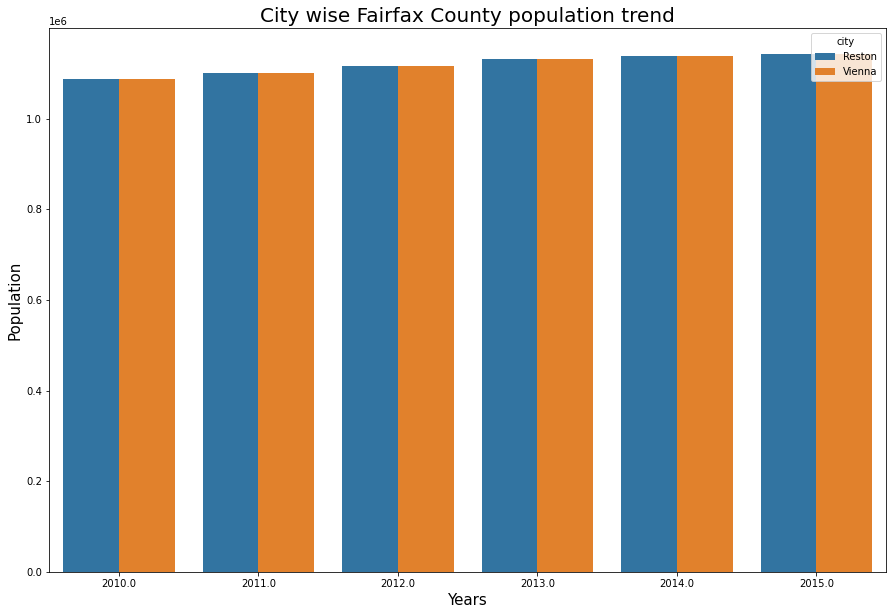

In [19]:
plt.subplots(figsize=(15,10))
sns.barplot(x=fairfax_county_data['year'], y= fairfax_county_data['county_population'], hue= fairfax_county_data['city'])
plt.title("City wise Fairfax County population trend", size = 20)
plt.xlabel("Years", size = 15)
plt.ylabel("Population", size = 15)
plt.show()